## Raw Input Data

The data you'll be working with has been preprocessed from CSVs that looks like this:

| timestamp | displacement  | yaw_rate | acceleration |
| :-------: | :----------: | :------: | :----------: |
| 0.0 | 0 | 0.0 | 0.0 |
| 0.25 | 0.0 | 0.0 | 19.6 |
| 0.5 | 1.225 | 0.0 | 19.6 |
| 0.75 | 3.675 | 0.0 | 19.6 |
| 1.0 | 7.35 | 0.0 | 19.6 |
| 1.25 | 12.25 | 0.0 | 0.0 |
| 1.5 | 17.15 | -2.82901631903 | 0.0 |
| 1.75 | 22.05 | -2.82901631903 | 0.0 |
| 2.0 | 26.95 | -2.82901631903 | 0.0 |
| 2.25 | 31.85 | -2.82901631903 | 0.0 |
| 2.5 | 36.75 | -2.82901631903 | 0.0 |
| 2.75 | 41.65 | -2.82901631903 | 0.0 |
| 3.0 | 46.55 | -2.82901631903 | 0.0 |
| 3.25 | 51.45 | -2.82901631903 | 0.0 |
| 3.5 | 56.35 | -2.82901631903 | 0.0 |

This data is currently saved in a file called `trajectory_example.pickle`. It can be loaded using a helper function we've provided (demonstrated below):

In [7]:
from helpers import process_data
%matplotlib inline

data_list = process_data("trajectory_example.pickle")

for entry in data_list:
    print(entry)

(0.0, 0, 0.0, 0.0)
(0.25, 0.0, 0.0, 19.600000000000001)
(0.5, 1.2250000000000001, 0.0, 19.600000000000001)
(0.75, 3.6750000000000003, 0.0, 19.600000000000001)
(1.0, 7.3500000000000005, 0.0, 19.600000000000001)
(1.25, 12.25, 0.0, 0.0)
(1.5, 17.149999999999999, -2.8290163190291664, 0.0)
(1.75, 22.049999999999997, -2.8290163190291664, 0.0)
(2.0, 26.949999999999996, -2.8290163190291664, 0.0)
(2.25, 31.849999999999994, -2.8290163190291664, 0.0)
(2.5, 36.749999999999993, -2.8290163190291664, 0.0)
(2.75, 41.649999999999991, -2.8290163190291664, 0.0)
(3.0, 46.54999999999999, -2.8290163190291664, 0.0)
(3.25, 51.449999999999989, -2.8290163190291664, 0.0)
(3.5, 56.349999999999987, -2.8290163190291664, 0.0)


as you can see, each entry in `data_list` contains four fields. Those fields correspond to `timestamp` (seconds), `displacement` (meters), `yaw_rate` (rads / sec), and `acceleration` (m/s/s).

### The Point of this Project!
**Data tells a story but you have to know how to find it!** 

Contained in the data above is all the information you need to reconstruct a fairly complex vehicle trajectory. After processing **this** exact data, it's possible to generate this plot of the vehicle's X and Y position:

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a3044ac_example-trajectory/example-trajectory.png)

as you can see, this vehicle first accelerates forwards and then turns right until it almost completes a full circle turn.

### Data Explained

**`timestamp`** - Timestamps are all measured in seconds. The time between successive timestamps ($\Delta t$) will always be the same *within* a trajectory's data set (but not *between* data sets).

**`displacement`** - Displacement data from the odometer is in meters and gives the **total** distance traveled up to this point.

**`yaw_rate`** - Yaw rate is measured in radians per second with the convention that positive yaw corresponds to *counter-clockwise* rotation. 

**`acceleration`** - Acceleration is measured in $\frac{m/s}{s}$ and is always **in the direction of motion of the vehicle** (forward). 

> **NOTE** - you may not need to use all of this data when reconstructing vehicle trajectories.

## Your Job
Your job is to complete the following functions, all of which take a processed `data_list` (with $N$ entries, each $\Delta t$ apart) as input:

* `get_speeds` - returns a length $N$ list where entry $i$ contains the speed ($m/s$) of the vehicle at $t = i \times \Delta t$ 

* `get_headings` - returns a length $N$ list where entry $i$ contains the heading (radians, $0 \leq \theta < 2\pi$) of the vehicle at $t = i \times \Delta t$

* `get_x_y` - returns a length $N$ list where entry $i$ contains an `(x, y)` tuple corresponding to the $x$ and $y$ coordinates (meters) of the vehicle at $t = i \times \Delta t$ 

* `show_x_y` - generates an x vs. y scatter plot of vehicle positions. 

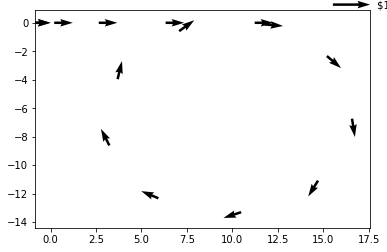

In [8]:
# I've provided a solution file called solution.py
# You are STRONGLY encouraged to NOT look at the code
# until after you have solved this yourself.
#
# You SHOULD, however, feel free to USE the solution 
# functions to help you understand what your code should
# be doing. For example...
from helpers import process_data
import solution

data_list = process_data("trajectory_example.pickle")
solution.show_x_y(data_list)

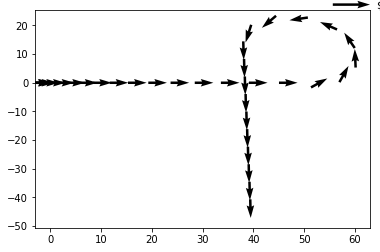

In [9]:
# What about the other trajectories?

three_quarter_turn_data = process_data("trajectory_1.pickle")
solution.show_x_y(three_quarter_turn_data, increment=10)

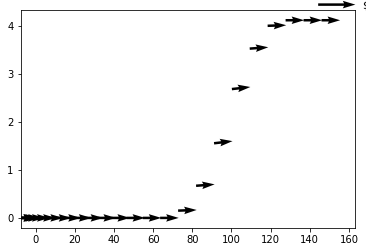

In [10]:
merge_data = process_data('trajectory_2.pickle')
solution.show_x_y(merge_data,increment=10)

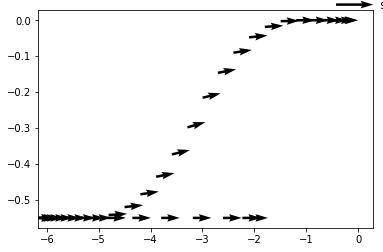

In [11]:
parallel_park = process_data("trajectory_3.pickle")
solution.show_x_y(parallel_park,increment=5)

**How do you make those cool arrows?!**

I did a Google search for "python plot grid of arrows" and the second result led me to some [demonstration code](https://matplotlib.org/examples/pylab_examples/quiver_demo.html) that was really helpful. 

## Testing Correctness
Testing code is provided at the bottom of this notebook. Note that only `get_speeds`, `get_x_y`, and `get_headings` are tested automatically. You will have to "test" your `show_x_y` function by manually comparing your plots to the expected plots. 

### Initial Vehicle State

The vehicle always begins with all state variables equal to zero. This means `x`, `y`, `theta` (heading), `speed`, `yaw_rate`, and `acceleration` are 0 at t=0.

----

## Your Code!
Complete the functions in the cell below. I recommend completing them in the order shown. Use the cells at the end of the notebook to test as you go.

#### This code-block contains my solution how i would solve the problem when the udacity-tests won't expect the size of the speed-lists etc. to be same-sized to the input-list.

In [75]:
from math import pi, cos, sin
from matplotlib import pyplot as plt

def get_speeds(data_list):
    """ 
    Calculate speed-data by the given timestamp- and displacement-data. 
    The speed-data is returned as an array in m/s (meter per second)
    """
    
    # Extract timestamps and displacements as array from data_list (array of arrays)
    timestamps = [item[0] for item in data_list]
    displacements = [item[1] for item in data_list]
    
    speeds = [0.0] # starting speed is zero m/s
    
    # Should not happend, just to ensure arrays are same-sized. This may also be useful when this
    # function does not access the whole data_list but instead only receive the to required arrays.
    if len(timestamps) != len(displacements):
        raise Exception("Measured displacement und timestamp has to be equal-sized")
    
    for index in range(1, len(displacements)):
        deltaTime = timestamps[index] - timestamps[index - 1]
        deltaDisplacement = displacements[index] - displacements[index - 1]
        
        if deltaTime == 0.0:
            raise Exception("Time delta has to be greater than 0.0")
        speeds.append(deltaDisplacement / deltaTime)
    
    return speeds


def radianToDegree(radian):
    """
    Convert radian to degree values. Radian is used by python-math function but the measured-data contain degree-values
    """
    return radian * 180 / pi


def get_headings(data_list):
    
    yaw_rates = [item[2] for item in data_list]
    timestamps = [item[0] for item in data_list]
    
    heading_degrees = [0.0]   # Result array
    headingDegree = 0.0    # Used for caluclations
    
    for index in range(1, len(yaw_rates)):
        timeDelta = timestamps[index] - timestamps[index - 1]
        currDegree = yaw_rates[index] * timeDelta
        headingDegree += currDegree
        heading_degrees.append(headingDegree)
    
    return heading_degrees


def getAdjacentLength(hypotenuse, degree):
    """
    Get the length of the adjacent in a right-triangle using the hypotenuse and degree
    Formulas: https://revisionmaths.com/gcse-maths-revision/trigonometry/sin-cos-and-tan
    """
    #print("getAdjacentLength => hypotenuse:", hypotenuse, "   degree:", degree, " => ", cos(degree) * hypotenuse)
    return cos(degree) * hypotenuse

    
def getOppositeLength(hypotenuse, degree):
    """
    Get the length of the opposite in a right-triangle using the hypotenuse and degree
    Formulas: https://revisionmaths.com/gcse-maths-revision/trigonometry/sin-cos-and-tan
    """
    #print("getOppositeLength => hypotenuse:", hypotenuse, "   degree:", degree, " => ", sin(degree) * hypotenuse)
    return sin(degree) * hypotenuse


def get_x_y(data_list):
    positions = []
    prevPos = [0.0, 0.0]
    headings_degree = get_headings(data_list)
    displacements = [item[1] for item in data_list]
    prevDisplacement = 0.0
    #print(displacements)
        
    for index in range(len(headings_degree)):
        displacementDelta = displacements[index] - prevDisplacement
        deltaX = getAdjacentLength(displacementDelta, headings_degree[index])
        deltaY = getOppositeLength(displacementDelta, headings_degree[index])
        nextPos = [prevPos[0] + deltaX, prevPos[1] + deltaY]
        prevPos = nextPos
        positions.append(nextPos)
        prevDisplacement = displacements[index]
        
    return positions
 

def show_x_y(data_list):
    positions = get_x_y(data_list)
    X = [item[0] for item in positions]
    Y = [item[1] for item in positions]
    
    plt.plot(X,Y)
    plt.show()
    return

## Testing
Test your functions by running the cells below.

In [76]:
from testing import test_get_speeds, test_get_x_y, test_get_headings

test_get_speeds(get_speeds)

PASSED test of get_speeds function!


In [77]:
test_get_headings(get_headings)

PASSED test of get_headings function!


In [78]:
test_get_x_y(get_x_y)

PASSED test of get_x_y function!


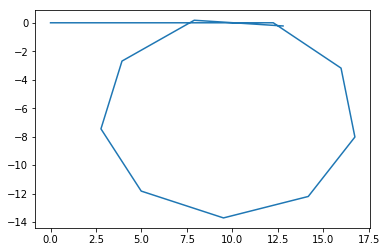

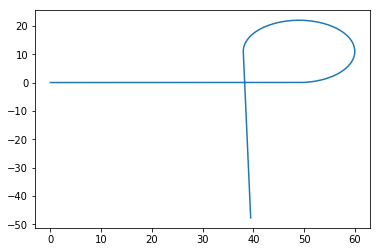

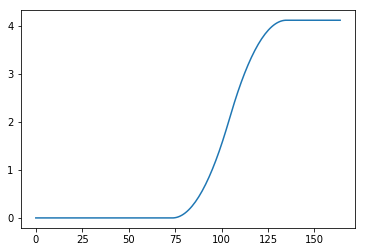

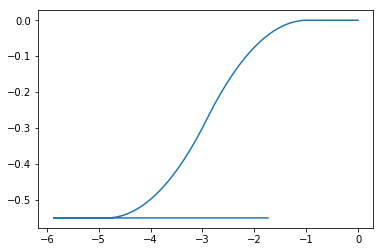

In [79]:
data_list = process_data("trajectory_example.pickle")
show_x_y(data_list)
data_list = process_data("trajectory_1.pickle")
show_x_y(data_list)
data_list = process_data("trajectory_2.pickle")
show_x_y(data_list)
data_list = process_data("trajectory_3.pickle")
show_x_y(data_list)